In [1]:
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.manifold import TSNE
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from sklearn.feature_extraction import DictVectorizer

df_prep = pd.read_csv('C:/Users/afshi/OneDrive/Documents/unsuper/final/final/clean_data.csv')
df_prep = df_prep.drop(columns=['Unnamed: 0'])

In [2]:

df_prep.head()

,Total Employees,Tech/No Tech,Tech Role,MH Benefits,Awareness of Company MH Care,Formal MH Discussion,MH Resources,Anonymity,Medical Leave,MH Negative Impact,...,Professional Diagnosis,Sought Treatment,MH Interference Treatment,MH Interference No Treatment,Age,Gender,Country,State,Position,Remote
0,3,1.0,1.0,Not eligible for coverage / N/A,I am not sure,No,No,I don't know,1,No,...,Yes,0,Not applicable to me,Not applicable to me,3,Male,UK,9,Back-end Developer,Sometimes
1,2,1.0,1.0,No,Yes,Yes,Yes,Yes,2,No,...,Yes,1,Rarely,Sometimes,2,Male,USA,5,Full track,Never
2,2,1.0,1.0,No,I am not sure,No,No,I don't know,3,Maybe,...,No,1,Not applicable to me,Not applicable to me,3,Male,UK,9,Back-end Developer,Always
3,2,0.0,0.0,Yes,Yes,No,No,No,3,Yes,...,Yes,1,Sometimes,Sometimes,4,Female,USA,5,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes
4,6,1.0,1.0,Yes,I am not sure,No,Yes,Yes,2,Yes,...,No,1,Not applicable to me,Often,4,Male,UK,9,DevOps/SysAdmin|Support|Back-end Developer|Fro...,Sometimes


In [3]:
df_prep.isnull().sum()



Total Employees                        0
Tech/No Tech                           0
Tech Role                              0
MH Benefits                            0
Awareness of Company MH Care           0
Formal MH Discussion                   0
MH Resources                           0
Anonymity                              0
Medical Leave                          0
MH Negative Impact                     0
PH Negative Impact                     0
Telling Coworkers                      0
Telling Supervisors                    0
MH PH Equal                            0
Observed Negative Impact               0
Previous Employers                     0
PH Potential Employer                  0
MH Potential Employer                  0
MH Identification Career Harm          0
Negative Impact Coworkers              0
Sharing w/ Family/Friends              0
Prev Observed Unsupportive Response    0
MH Family History                      0
Past Mental Disorder                   0
Current Mental D

In [4]:
encoder_dict = {
'Always':1,
'I am not sure':2,
"I don't know":0,
'I was aware of some':2,
'Maybe':2,
'Maybe/Not sure':2,
'N/A (not currently aware)':0,
'Neither easy nor difficult':3,
'Neutral':3,
'Never':0,
'No':0,
'No, at none of my previous employers':0,
"No, I don't think it would":0,
"No, I don't think they would":0,       
'No, I only became aware later':0,      
'No, it has not':0,
'No, none did':0,
'No, they do not':0,
'None did':0,
'None of them':0,
'Not applicable to me':0,
'Not applicable to me (I do not have a mental illness)':0,
'Not eligible for coverage / N/A':0,
'Not eligible for coverage / N/A':0,
'Not open at all':0,
'Often':1,
'Rarely':0,
'Some did':2,
'Some of my previous employers':2,      
'Some of them':2,
'Sometimes':2,
'Somewhat difficult':4,
'Somewhat easy':2,
'Somewhat not open':2,
'Somewhat open':2,
'Very difficult':5,
'Very easy':1,
'Very open':1,
'Yes':1,
'Yes, all of them':1,
'Yes, always':1,
'Yes, at all of my previous employers':1,
'Yes, I experienced':1,
'Yes, I observed':1,
'Yes, I think it would':1,
'Yes, I think they would':1,
'Yes, I was aware of all of them':1,    
'Yes, it has':1,
'Yes, they all did':1,
'Yes, they do':1
}
columns = df_prep.columns
def get_val(key):
        value = encoder_dict.get(key)
        return (value)
for i in columns:
        c1 = df_prep[i].unique()
        for j in c1:
            if j in encoder_dict:
                get = get_val(j)
                df_prep[i][df_prep[i] == j] = get 


In [5]:
df_prep.isnull().sum()
df_prep.head()

,Total Employees,Tech/No Tech,Tech Role,MH Benefits,Awareness of Company MH Care,Formal MH Discussion,MH Resources,Anonymity,Medical Leave,MH Negative Impact,...,Professional Diagnosis,Sought Treatment,MH Interference Treatment,MH Interference No Treatment,Age,Gender,Country,State,Position,Remote
0,3,1.0,1.0,0,2,0,0,0,1,0,...,1,0,0,0,3,Male,UK,9,Back-end Developer,2
1,2,1.0,1.0,0,1,1,1,1,2,0,...,1,1,0,2,2,Male,USA,5,Full track,0
2,2,1.0,1.0,0,2,0,0,0,3,2,...,0,1,0,0,3,Male,UK,9,Back-end Developer,1
3,2,0.0,0.0,1,1,0,0,0,3,1,...,1,1,2,2,4,Female,USA,5,Executive Leadership|Supervisor/Team Lead|Dev ...,2
4,6,1.0,1.0,1,2,0,1,1,2,1,...,0,1,0,1,4,Male,UK,9,DevOps/SysAdmin|Support|Back-end Developer|Fro...,2


In [6]:
df_prep['Gender'] = df_prep['Gender'].map({'Female': 1, "Male":0,'Other':2})
df_prep.drop('Position',  axis=1, inplace=True)
df_prep['Gender'] = df_prep['Gender'].fillna(0)


In [7]:
def country_encoding(country):
    if country == "USA":
        return 1
    elif country == "UK":
        return 2
    elif country == "Canada":
        return 3
    elif country == "Germany":
        return 4
    elif country == "Netherlands":
        return 5
    elif country == "Australia":
        return 6
    else:
        return 7
df_prep['Country'] = df_prep['Country'].apply(country_encoding)

In [8]:
df_prep.head()

,Total Employees,Tech/No Tech,Tech Role,MH Benefits,Awareness of Company MH Care,Formal MH Discussion,MH Resources,Anonymity,Medical Leave,MH Negative Impact,...,Current Mental Disorder,Professional Diagnosis,Sought Treatment,MH Interference Treatment,MH Interference No Treatment,Age,Gender,Country,State,Remote
0,3,1.0,1.0,0,2,0,0,0,1,0,...,0,1,0,0,0,3,0,2,9,2
1,2,1.0,1.0,0,1,1,1,1,2,0,...,1,1,1,0,2,2,0,1,5,0
2,2,1.0,1.0,0,2,0,0,0,3,2,...,0,0,1,0,0,3,0,2,9,1
3,2,0.0,0.0,1,1,0,0,0,3,1,...,1,1,1,2,2,4,1,1,5,2
4,6,1.0,1.0,1,2,0,1,1,2,1,...,1,0,1,0,1,4,0,2,9,2


In [9]:
# check is there any string in dataset 
is_string = df_prep.values.tolist()
string.ascii_lowercase
strings = list(string.ascii_lowercase)
stringsy = list(string.ascii_uppercase)

if is_string not in strings:
    print('True')

if is_string not in stringsy:
    print('True')
df_prep.to_csv('C:/Users/afshi/OneDrive/Documents/unsuper/final/final/clean_encode_data_for_prediction.csv')


True
True


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1146 samples in 0.000s...
[t-SNE] Computed neighbors for 1146 samples in 0.260s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1146
[t-SNE] Computed conditional probabilities for sample 1146 / 1146
[t-SNE] Mean sigma: 0.900590
[t-SNE] Computed conditional probabilities in 0.059s
[t-SNE] Iteration 50: error = 65.5009079, gradient norm = 0.0000000 (50 iterations in 0.253s)
[t-SNE] Iteration 50: gradient norm 0.000000. Finished.
[t-SNE] KL divergence after 50 iterations with early exaggeration: 65.500908
[t-SNE] Iteration 100: error = 1.8135533, gradient norm = 0.0201677 (50 iterations in 0.266s)
[t-SNE] Iteration 150: error = 1.6539826, gradient norm = 0.0083319 (50 iterations in 0.251s)
[t-SNE] Iteration 200: error = 1.6033646, gradient norm = 0.0074261 (50 iterations in 0.239s)
[t-SNE] Iteration 250: error = 1.5768448, gradient norm = 0.0055014 (50 iterations in 0.211s)
[t-SNE] Iteration 300: error = 1.5639009,

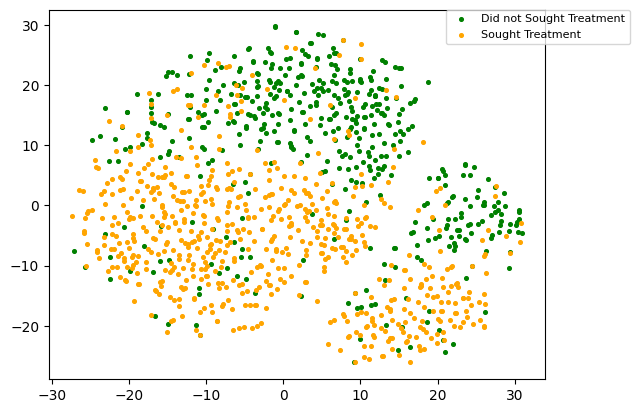

In [10]:
df_clean = pd.read_csv('C:/Users/afshi/OneDrive/Documents/unsuper/final/final/clean_encode_data_for_prediction.csv')

df_clean = df_clean.drop(columns=['Unnamed: 0'])

Y = df_clean.loc[:, df_clean.columns == 'Sought Treatment'].values.ravel()
x_vars = df_clean.loc[:, df_clean.columns != ('Sought Treatment')]
xx = x_vars.values 
min_max_scaler = preprocessing.MinMaxScaler()
xx_scaled = min_max_scaler.fit_transform(xx)
x_vars  = pd.DataFrame(xx_scaled)
# transform to dictionary
dict_df = x_vars.to_dict('records')
# transform to vector
v = DictVectorizer(sparse=False)
X = v.fit_transform(dict_df)
data_embed=TSNE(n_components=2, perplexity=50, verbose=2, method='barnes_hut').fit_transform(X)
df_embed = pd.DataFrame(data_embed)
df_embed['Y'] = Y
no_treatment = df_embed[df_embed['Y'] == 0]
x_axis_no = no_treatment[0]
y_axis_no = no_treatment[1]
yes_treatment = df_embed[df_embed['Y'] == 1]
x_axis_yes = yes_treatment[0]
y_axis_yes = yes_treatment[1]
plt.scatter(x_axis_no, y_axis_no, color='green', label="Did not Sought Treatment", s=7)
plt.scatter(x_axis_yes, y_axis_yes, color='orange', label="Sought Treatment", s=7)
plt.legend(bbox_to_anchor=(0.8, 1), loc=2, borderaxespad=0.0, fontsize=8)
plt.savefig('C:/Users/afshi/OneDrive/Documents/unsuper/final/final/TSNE.png')
#plt.legend(bbox_to_anchor=(1, 1))

plt.show()


0.8802992518703242
0.872093023255814
[[307  47]
 [ 49 399]]
[[116  19]
 [ 25 184]]


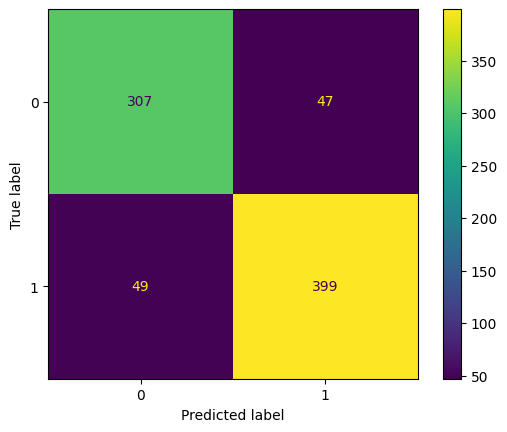

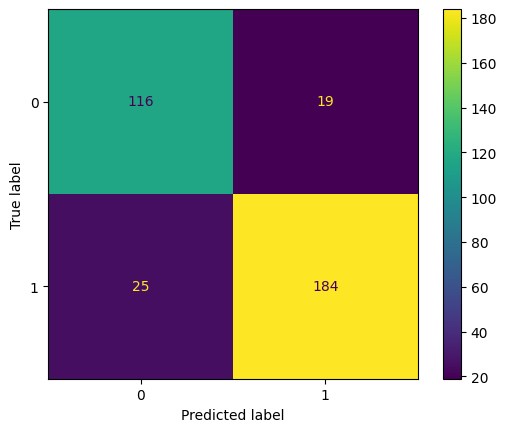

In [11]:
# prediction

y = df_clean.loc[:, df_clean.columns == 'Sought Treatment'].values.ravel()
X = df_clean.loc[:, df_clean.columns != 'Sought Treatment']
X_train, X_val, Y_train, Y_val = train_test_split(X, y, test_size=0.30)
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_train, Y_train)
print(accuracy_score(clf.predict(X_train), Y_train))
print(accuracy_score(clf.predict(X_val), Y_val))
CM_train = confusion_matrix(Y_train, clf.predict(X_train))
CM_val = confusion_matrix(Y_val, clf.predict(X_val))
print(CM_train)
print(CM_val)
predictions = clf.predict(X_train)
cm = confusion_matrix(Y_train, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
predictions = clf.predict(X_val)
cm = confusion_matrix(Y_val, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
 

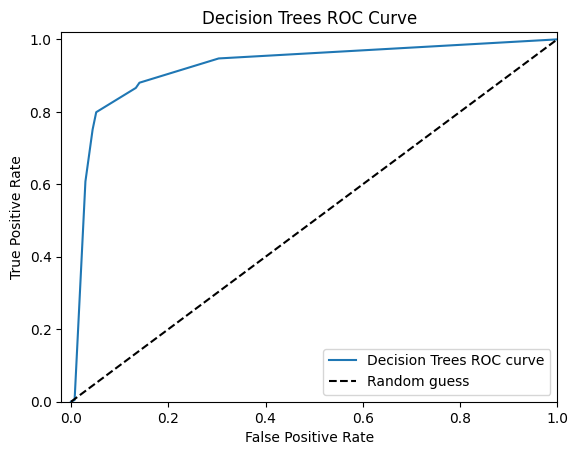

In [12]:
from sklearn.metrics import roc_curve
y_pred_prob = clf.predict_proba(X_val)[:,1]
%matplotlib inline
fpr, tpr, thresholds = roc_curve(Y_val, y_pred_prob)
# create plot
plt.plot(fpr, tpr, label='Decision Trees ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('Decision Trees ROC Curve')
_ = plt.xlim([-0.02, 1])
_ = plt.ylim([0, 1.02])
_ = plt.legend(loc="lower right")

plt.savefig('C:/Users/afshi/OneDrive/Documents/unsuper/final/final/roc.png')

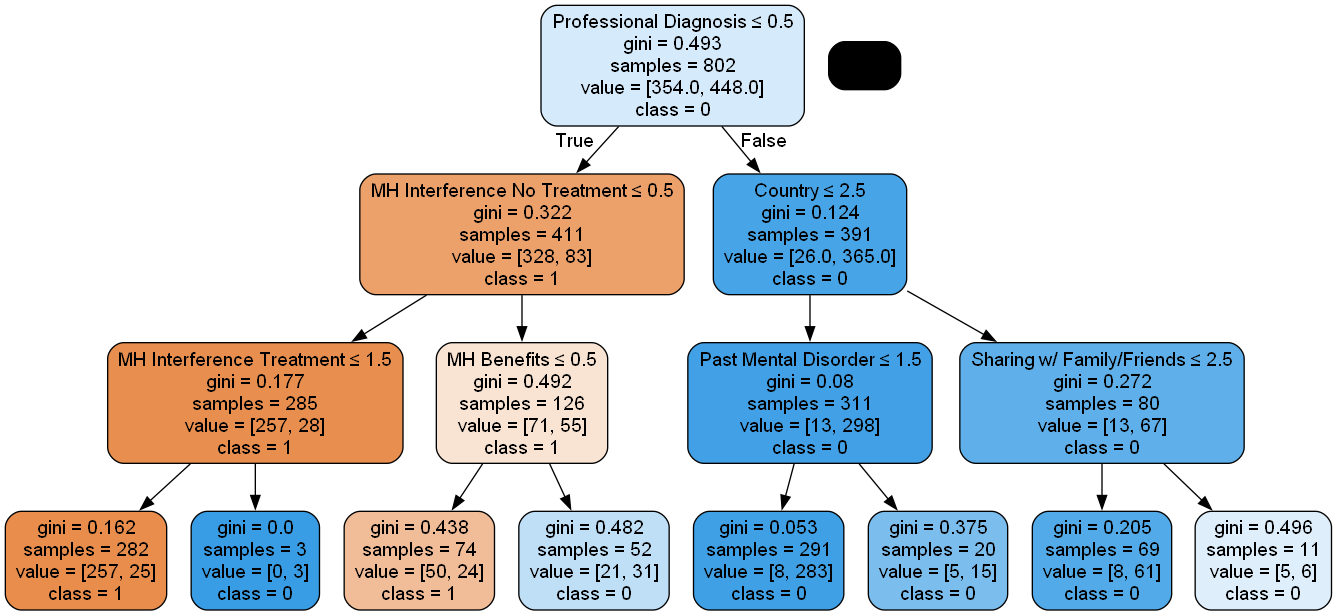

In [13]:
from io import StringIO
from sklearn import tree
import pydotplus 
from IPython.display import Image 
import graphviz
 
dotfile = StringIO() 
tree.export_graphviz(clf, out_file=dotfile, feature_names=X_train.columns, class_names=['1', '0'], filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dotfile.getvalue())
Image(graph.create_png())

0.8488372093023255
[[126  19]
 [ 33 166]]


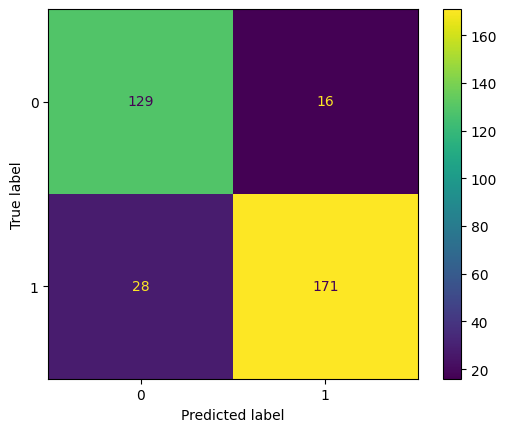

In [14]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_val, Y_train, Y_val = train_test_split(X, y, test_size=0.30)
forest = RandomForestClassifier(n_estimators=1000, max_depth=5, random_state=0)
forest.fit(X_train, Y_train)
print(accuracy_score(forest.predict(X_val), Y_val))
CM = confusion_matrix(Y_val, forest.predict(X_val))
print(CM)
#plot_confusion_matrix(forest, X_val, Y_val, cmap=plt.cm.Blues)
plt.show()
predictions = clf.predict(X_val)
cm = confusion_matrix(Y_val, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()

In [15]:


names = ['SVC', 'Logistic Regression', 'RandomForestClassifier', 'Decision Tree', 'GradientBoostingClassifier', 'XG Boost']
models = [SVC(), LogisticRegression(), RandomForestClassifier(), DecisionTreeClassifier(), \
         GradientBoostingClassifier(), XGBClassifier()]
model_dict = dict(zip(models, names))


In [16]:
def model_fit(model, X_train, Y_train):
    model.fit(X_train, Y_train)
    train_score = roc_auc_score(Y_train, model.predict(X_train))
    test_score = roc_auc_score(Y_val, model.predict(X_val))
    return (train_score, test_score)
    
accuracy_list = []
def model_search_report(X_train, Y_train):
    # prepare scores
    train_scores = {}
    test_scores = {}
    for model, name in model_dict.items():
        train_score, test_score = model_fit(model, X_train, Y_train)
        train_scores[name] = train_score
        test_scores[name] = test_score 

    # prepare reports
    report = pd.DataFrame()
    report['model'] = names
    report['train_score'] = train_scores.values()
    report['test_score'] = test_scores.values()
    
    print(report.sort_values(by='test_score'))
    

In [17]:
 model_search_report(X_train, Y_train)

                        model  train_score  test_score
3               Decision Tree     1.000000    0.774718
5                    XG Boost     1.000000    0.841518
1         Logistic Regression     0.889078    0.842454
0                         SVC     0.889465    0.843441
4  GradientBoostingClassifier     0.966176    0.852504
2      RandomForestClassifier     1.000000    0.866002


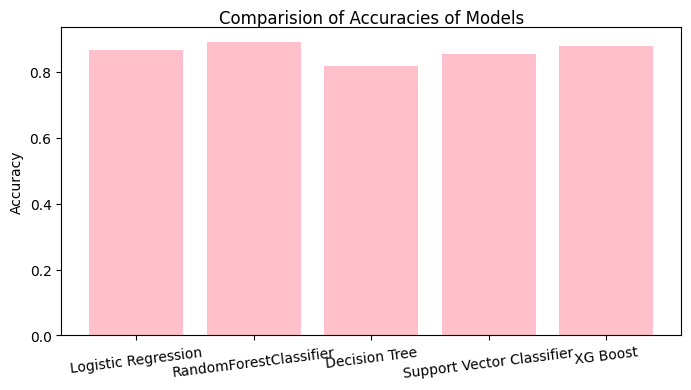

In [19]:
    
models = [('Logistic Regression',LogisticRegression()),
          ('RandomForestClassifier',RandomForestClassifier()),
          ('Decision Tree',DecisionTreeClassifier()),
          ('Support Vector Classifier',SVC()),
          ('XG Boost',XGBClassifier())]

accuracy_list = []
for model in models:
    model[1].fit(X_train, Y_train)
    y_pred = model[1].predict(X_val)
    accuracy_list.append(accuracy_score(Y_val, y_pred))
plt.figure(figsize=(8, 4))
model_names = [x[0] for x in models]
y_pos = range(len(models))
#plt.bar(y_pos, accuracy_list, align='center', alpha=0.5)
plt.bar(y_pos, accuracy_list, color='pink')
plt.xticks(y_pos, [x[0] for x in models], rotation=7, fontsize= 10)
plt.ylabel('Accuracy')
plt.title('Comparision of Accuracies of Models',  fontweight=10,
          pad='2.0')

plt.savefig('C:/Users/afshi/OneDrive/Documents/unsuper/final/final/pred.png')

plt.show()